In [632]:
# 期待値
e = (0.49*(200 + 0) + 0.51*(0 + 200*0.9975))/2

# 出金額
bonus = 1216

# 還元率（バカラ）
exchange_rate_bakara = 100/15

# 出金条件
ex_condition = 20

# 出金に必要なベット額
total_mandatory_bet = bonus * exchange_rate_bakara * ex_condition
print("出金に必要なベット額：　" + str(total_mandatory_bet) + "ドル")

出金に必要なベット額：　162133.33333333334ドル


In [634]:
import math

def ex_bet(total_mandatory_bet, one_bet):
    one_time = 0.25 # 0.5分=30秒
    total_times = int(total_mandatory_bet/one_bet) # 回数
    
    print("出金までに必要なベット回数：" + str(total_times) + "回")
    print("出金までに必要なベット回数を満たすために必要な時間：" + str(total_times*one_time/60) + "時間")
    print("時給：" + str(bonus/(total_times*one_time/60)) + "ドル")
    
    zero_bonus_condition = int(bonus/one_bet)
    one_time_happen_prob = (1/2)**zero_bonus_condition*100
    
    # total_time回中1回発生する確率
    one_time_prob_on_n = successive_trial(total_times, 1, one_time_happen_prob)
    
    print("連続：" + str(zero_bonus_condition) + "回負けたらボーナス0円")
    print("発生確率：" + "{:.20f}".format(one_time_happen_prob) + "%")
    print("全" + str(total_times) + "回中での発生確率：" + \
          "{:.20f}".format(one_time_prob_on_n)+ "%\n")
    
def successive_trial(n, r, prob):
    return combination(n, r) * (prob)**r * (1-prob)**(n-r)
        

def combination(n, r):
    return math.factorial(n) // (math.factorial(n - r) * math.factorial(r))    

In [635]:
ex_bet(total_mandatory_bet, 10) # 10ドルベット

出金までに必要なベット回数：16213回
出金までに必要なベット回数を満たすために必要な時間：67.55416666666666時間
時給：18.000370073397892ドル
連続：121回負けたらボーナス0円
発生確率：0.00000000000000000000%
全16213回中での発生確率：0.00000000000000000000%



In [426]:
import random

def bakara(bet_side, amount, verbose_opt):
    bakara_value = random.random()
    bakara_result = ""
    
    if bakara_value < 0.49:
        bakara_result = "p"
        if bet_side == "p":
            if verbose_opt:
                print("ベット側:" + bet_side + " ベット額:" + str(amount) + " 勝利")
            return amount * 2
        else:
            if verbose_opt:
                print("ベット側:" + bet_side + " ベット額:" + str(amount) + " 敗北")
            return 0
    #elif 0.4462 <= bakara_value < 0.4462 + 0.0952:
    #    bakara_result = "t"
    #    if bet_side == "t":
    #        if verbose_opt:
    #            print("ベット側:" + bet_side + " ベット額:" + str(amount) + " 勝利")
    #        return amount * 8
    #    else:
    #        if verbose_opt:
    #            print("ベット側:" + bet_side + " ベット額:" + str(amount) + " タイ")
    #        return amount
    else:
        bakara_result = "b"
        if bet_side == "b":
            if verbose_opt:
                print("ベット側:" + bet_side + " ベット額:" + str(amount) + " 勝利")
            return amount * 1.95
        else:
            if verbose_opt:
                print("ベット側:" + bet_side + " ベット額:" + str(amount) + " 敗北")
            return 0

In [637]:
def bet_with_prob(p_prob):
    r = random.random()
    if r<p_prob:
        return "p"
    else:
        return "b"

def bakara_random_bet(times, bet_amount, verbose_opt):
    movements = []
    last_money = 0
    for i in range(0, times):
        last_money += bakara(bet_with_prob(0.49), bet_amount, verbose_opt) - bet_amount
        movements.append(last_money)
        if verbose_opt:
            print("所持金:" + str(last_money))
    return last_money, movements

In [638]:
def bakara_simulator(sample_size, times, bet_amount):
    last_money_list = []
    movements_list = []

    for i in range(0, sample_size):
        l, m = bakara_random_bet(times, bet_amount, False)
        last_money_list.append(l)
        movements_list.append(m)
        
    return last_money_list, movements_list

平均:-2037.243
標準偏差:1244.8923000073808


(array([  1.,  12.,  83., 325., 735., 877., 650., 242.,  68.,   7.]),
 array([-7228.5, -6266.4, -5304.3, -4342.2, -3380.1, -2418. , -1455.9,
         -493.8,   468.3,  1430.4,  2392.5]),
 <a list of 10 Patch objects>)

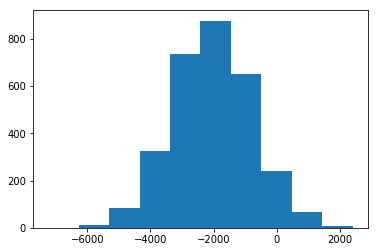

In [639]:
last_money_list, movements_list = bakara_simulator(3000, 16000, 10)

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

np_last_money = np.array(last_money_list)
np_movements = np.array(movements_list)

print("平均:" + str(np_last_money.mean()))
print("標準偏差:" + str(np_last_money.std()))

plt.hist(np_last_money)